In [1]:
#Create Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [2]:
#Read in DataFrames

#GDP per Capita
gdp_per_capita_file = "Baseline_Indicator_Data/GDP_per_Capita/GDP_per_Capita_Data.csv"
gdp_per_capita_df = pd.read_csv(gdp_per_capita_file, skiprows = 4)

#GNI per Capita
gni_per_capita_file = "Baseline_Indicator_Data/GNI_per_Capita/GNI_per_Capita_Data.csv"
gni_per_capita_df = pd.read_csv(gni_per_capita_file, skiprows = 4)

#Life Expectancy
life_expectancy_file = "Baseline_Indicator_Data/Life_Expectancy/Life_Expectancy_Data.csv"
life_expectancy_df = pd.read_csv(life_expectancy_file, skiprows = 4)

#Infant Mortality
infant_mortality_file = "Baseline_Indicator_Data/Infant_Mortality/Infant_Mortality_Data.csv"
infant_mortality_df = pd.read_csv(infant_mortality_file, skiprows = 4)

#Exports
exports_file = "Baseline_Indicator_Data/Exports/Export_Data.csv"
exports_df = pd.read_csv(exports_file, skiprows = 4)

#Imports
imports_file = "Baseline_Indicator_Data/Imports/Import_Data.csv"
imports_df = pd.read_csv(imports_file, skiprows = 4)

In [3]:
#Add Suffixes to Columns Except Country Code
#Code found on https://stackoverflow.com/questions/34049618/how-to-add-a-suffix-or-prefix-to-each-column-name
#Add a Suffix to Differentiate Columns For Merge
gdp_per_capita_df = gdp_per_capita_df.add_suffix("_GDP_Cap")
#Drop Suffix from 'CountryCode' column to Allow Merge
gdp_per_capita_df = gdp_per_capita_df.rename(columns = {"CountryCode_GDP_Cap":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
life_expectancy_df = life_expectancy_df.add_suffix("_Life")
#Drop Suffix from 'CountryCode' column to Allow Merge
life_expectancy_df = life_expectancy_df.rename(columns = {"CountryCode_Life":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
infant_mortality_df = infant_mortality_df.add_suffix("_Mortality")
#Drop Suffix from 'CountryCode' column to Allow Merge
infant_mortality_df = infant_mortality_df.rename(columns = {"CountryCode_Mortality":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
exports_df = exports_df.add_suffix("_Exports")
#Drop Suffix from 'CountryCode' column to Allow Merge
exports_df = exports_df.rename(columns = {"CountryCode_Exports":"CountryCode"})

#Add a Suffix to Differentiate Columns For Merge
imports_df = imports_df.add_suffix("_Imports")
#Drop Suffix from 'CountryCode' column to Allow Merge
imports_df = imports_df.rename(columns = {"CountryCode_Imports":"CountryCode"})

In [4]:
#Merge the DataFrames
#GDP per Capita & Life Expectancy
summary_df = pd.merge(gdp_per_capita_df, life_expectancy_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Life,2011_Life,2012_Life,2013_Life,2014_Life,2015_Life,2016_Life,2017_Life,2018_Life,2019_Life
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,75.017,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,61.028,61.55300,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,55.350,56.33000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,76.562,76.91400,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341,NaN,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,65.549,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,57.669,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,NaN,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,55.655,57.12600,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,NaN,NaN


In [5]:
#Merge the DataFrames
#Summary & Infant Mortality
summary_df = pd.merge(summary_df, infant_mortality_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Mortality,2011_Mortality,2012_Mortality,2013_Mortality,2014_Mortality,2015_Mortality,2016_Mortality,2017_Mortality,2018_Mortality,2019_Mortality
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,64.3,61.9,59.5,57.3,55.1,53.1,51.2,49.5,47.9,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,71.5,67.3,63.6,60.5,57.8,55.5,53.4,51.6,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,11.9,11.0,10.2,9.5,8.9,8.5,8.2,8.0,7.8,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,3.7,3.6,3.4,3.2,3.1,3.0,2.8,2.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43.6,43.0,42.9,42.9,42.9,42.9,42.9,42.9,42.9,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,38.2,36.6,35.3,34.1,32.9,31.4,30.7,29.6,28.5,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,52.8,51.2,49.6,47.8,45.9,44.5,43.1,41.5,40.4,NaN


In [6]:
#Merge the DataFrames
#Summary & Exports
summary_df = pd.merge(summary_df, exports_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Exports,2011_Exports,2012_Exports,2013_Exports,2014_Exports,2015_Exports,2016_Exports,2017_Exports,2018_Exports,2019_Exports
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.459218e+09,1.729050e+09,1.653631e+09,1.770391e+09,1.850838e+09,1.873743e+09,1.848603e+09,1.912291e+09,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,2.945227e+09,3.900019e+09,3.793615e+09,4.028236e+09,3.233000e+09,2.326740e+09,1.148855e+09,1.192286e+09,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.157282e+10,6.782275e+10,7.163293e+10,6.937627e+10,6.512611e+10,3.457295e+10,2.844056e+10,3.542092e+10,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.337095e+09,3.769488e+09,3.565036e+09,3.694430e+09,3.732086e+09,3.104919e+09,3.437171e+09,4.110274e+09,4.785178e+09,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.162914e+09,1.581457e+09,1.511628e+09,1.550850e+09,1.662200e+09,1.412776e+09,1.591261e+09,1.926189e+09,2.098442e+09,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,1.074070e+11,1.268450e+11,1.178050e+11,1.136120e+11,1.104250e+11,9.577176e+10,9.062881e+10,1.035650e+11,1.101440e+11,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,7.503513e+09,9.494353e+09,1.022237e+10,1.135360e+10,1.054053e+10,7.889451e+09,7.402197e+09,9.093164e+09,9.999333e+09,NaN


In [7]:
#Merge the DataFrames
#Summary & Imports Mortality
summary_df = pd.merge(summary_df, imports_df, how = "inner", on = "CountryCode")
summary_df.to_csv("World_Development_indicators.csv")
summary_df

,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,1965_GDP_Cap,...,2010_Imports,2011_Imports,2012_Imports,2013_Imports,2014_Imports,2015_Imports,2016_Imports,2017_Imports,2018_Imports,2019_Imports
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.854190e+09,2.136313e+09,2.089385e+09,2.130726e+09,2.113408e+09,2.035754e+09,1.975419e+09,2.031844e+09,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,9.950050e+09,1.190656e+10,1.252506e+10,1.133990e+10,1.053200e+10,8.647160e+09,8.079197e+09,9.153344e+09,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.568226e+10,4.394739e+10,4.591971e+10,4.930420e+10,5.047164e+10,3.849951e+10,2.552939e+10,2.839711e+10,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.792202e+09,6.700290e+09,5.860856e+09,5.999409e+09,6.243051e+09,5.071012e+09,5.436291e+09,6.070288e+09,6.856193e+09,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.235894e+09,3.881568e+09,3.503276e+09,3.512347e+09,3.783468e+09,3.245314e+09,3.418805e+09,3.796935e+09,4.412299e+09,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,1.027470e+11,1.234750e+11,1.235600e+11,1.220460e+11,1.156790e+11,9.993671e+10,8.907688e+10,9.908540e+10,1.088780e+11,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,6.256989e+09,8.385253e+09,9.950731e+09,1.237210e+10,1.119723e+10,9.076584e+09,8.095640e+09,8.741805e+09,1.021691e+10,NaN


The Rsquared value is 0.25.


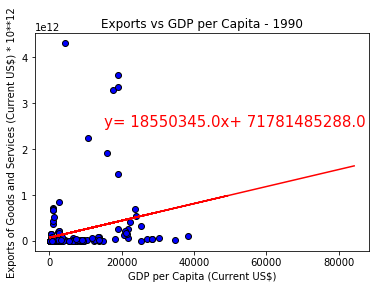

The Rsquared value is 0.14.


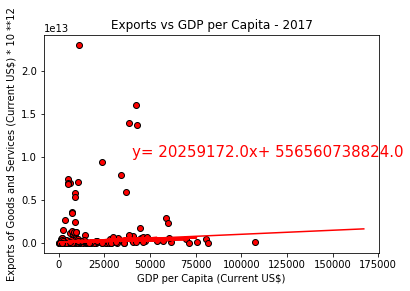

In [8]:
#Create a Scatter Plot of Exports vs GDP per Capita

#1990
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['1990_GDP_Cap']) & ~np.isnan(summary_df['1990_Exports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['1990_GDP_Cap'][mask], summary_df['1990_Exports'][mask])
#Calculate the Regress Values
regress_1990 = slope * summary_df['1990_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['1990_GDP_Cap'], summary_df['1990_Exports'], c = "blue", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['1990_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (15000, 2.5*10**12), fontsize = 15, color = "red")
#Create the Labels
plt.title("Exports vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Exports of Goods and Services (Current US$) * 10**12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Exports_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()


#2017
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['2017_GDP_Cap']) & ~np.isnan(summary_df['2017_Exports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['2017_GDP_Cap'][mask], summary_df['2017_Exports'][mask])
#Calculate the Regress Values
regress_2017 = slope * summary_df['2017_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_2017 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['2017_GDP_Cap'], summary_df['2017_Exports'], c = "red", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['2017_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_2017, xy = (40000, 1.0*10**13), fontsize = 15, color = "red")
#Create the Labels
plt.title("Exports vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Exports of Goods and Services (Current US$) * 10 **12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Exports_vs_GDP_per_Capita_2017")
#Show the Plot
plt.show()

The Rsquared value is 0.97.


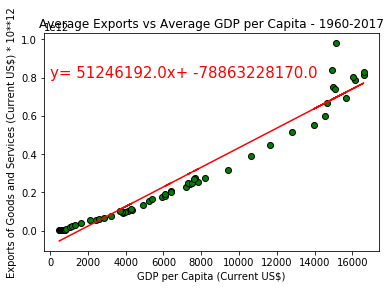

<Figure size 432x288 with 0 Axes>

In [9]:
#Create a Series Plot of Average Exports of Good and Services vs Average GDP per Capita Value Across Years

#Calculate the Average GDP per Capita Values
gdp_per_capita_1960 = summary_df['1960_GDP_Cap'].mean()
gdp_per_capita_1961 = summary_df['1961_GDP_Cap'].mean()
gdp_per_capita_1962 = summary_df['1962_GDP_Cap'].mean()
gdp_per_capita_1963 = summary_df['1963_GDP_Cap'].mean()
gdp_per_capita_1964 = summary_df['1964_GDP_Cap'].mean()
gdp_per_capita_1965 = summary_df['1965_GDP_Cap'].mean()
gdp_per_capita_1966 = summary_df['1966_GDP_Cap'].mean()
gdp_per_capita_1967 = summary_df['1967_GDP_Cap'].mean()
gdp_per_capita_1968 = summary_df['1968_GDP_Cap'].mean()
gdp_per_capita_1969 = summary_df['1969_GDP_Cap'].mean()
gdp_per_capita_1970 = summary_df['1970_GDP_Cap'].mean()
gdp_per_capita_1971 = summary_df['1971_GDP_Cap'].mean()
gdp_per_capita_1972 = summary_df['1972_GDP_Cap'].mean()
gdp_per_capita_1973 = summary_df['1973_GDP_Cap'].mean()
gdp_per_capita_1974 = summary_df['1974_GDP_Cap'].mean()
gdp_per_capita_1975 = summary_df['1975_GDP_Cap'].mean()
gdp_per_capita_1976 = summary_df['1976_GDP_Cap'].mean()
gdp_per_capita_1977 = summary_df['1977_GDP_Cap'].mean()
gdp_per_capita_1978 = summary_df['1978_GDP_Cap'].mean()
gdp_per_capita_1979 = summary_df['1979_GDP_Cap'].mean()
gdp_per_capita_1980 = summary_df['1980_GDP_Cap'].mean()
gdp_per_capita_1981 = summary_df['1981_GDP_Cap'].mean()
gdp_per_capita_1982 = summary_df['1982_GDP_Cap'].mean()
gdp_per_capita_1983 = summary_df['1983_GDP_Cap'].mean()
gdp_per_capita_1984 = summary_df['1984_GDP_Cap'].mean()
gdp_per_capita_1985 = summary_df['1985_GDP_Cap'].mean()
gdp_per_capita_1986 = summary_df['1986_GDP_Cap'].mean()
gdp_per_capita_1987 = summary_df['1987_GDP_Cap'].mean()
gdp_per_capita_1988 = summary_df['1988_GDP_Cap'].mean()
gdp_per_capita_1989 = summary_df['1989_GDP_Cap'].mean()
gdp_per_capita_1990 = summary_df['1990_GDP_Cap'].mean()
gdp_per_capita_1991 = summary_df['1991_GDP_Cap'].mean()
gdp_per_capita_1992 = summary_df['1992_GDP_Cap'].mean()
gdp_per_capita_1993 = summary_df['1993_GDP_Cap'].mean()
gdp_per_capita_1994 = summary_df['1994_GDP_Cap'].mean()
gdp_per_capita_1995 = summary_df['1995_GDP_Cap'].mean()
gdp_per_capita_1996 = summary_df['1996_GDP_Cap'].mean()
gdp_per_capita_1997 = summary_df['1997_GDP_Cap'].mean()
gdp_per_capita_1998 = summary_df['1998_GDP_Cap'].mean()
gdp_per_capita_1999 = summary_df['1999_GDP_Cap'].mean()
gdp_per_capita_2000 = summary_df['2000_GDP_Cap'].mean()
gdp_per_capita_2001 = summary_df['2001_GDP_Cap'].mean()
gdp_per_capita_2002 = summary_df['2002_GDP_Cap'].mean()
gdp_per_capita_2003 = summary_df['2003_GDP_Cap'].mean()
gdp_per_capita_2004 = summary_df['2004_GDP_Cap'].mean()
gdp_per_capita_2005 = summary_df['2005_GDP_Cap'].mean()
gdp_per_capita_2006 = summary_df['2006_GDP_Cap'].mean()
gdp_per_capita_2007 = summary_df['2007_GDP_Cap'].mean()
gdp_per_capita_2008 = summary_df['2008_GDP_Cap'].mean()
gdp_per_capita_2009 = summary_df['2009_GDP_Cap'].mean()
gdp_per_capita_2010 = summary_df['2010_GDP_Cap'].mean()
gdp_per_capita_2011 = summary_df['2011_GDP_Cap'].mean()
gdp_per_capita_2012 = summary_df['2012_GDP_Cap'].mean()
gdp_per_capita_2013 = summary_df['2013_GDP_Cap'].mean()
gdp_per_capita_2014 = summary_df['2014_GDP_Cap'].mean()
gdp_per_capita_2015 = summary_df['2015_GDP_Cap'].mean()
gdp_per_capita_2016 = summary_df['2016_GDP_Cap'].mean()
gdp_per_capita_2017 = summary_df['2017_GDP_Cap'].mean()
gdp_per_capita_2018 = summary_df['2018_GDP_Cap'].mean()
gdp_per_capita_2019 = summary_df['2019_GDP_Cap'].mean()

#Fill the GDP per Capita List
gdp_per_capita_list = [gdp_per_capita_1960, gdp_per_capita_1961, gdp_per_capita_1962, gdp_per_capita_1963, gdp_per_capita_1964,
                       gdp_per_capita_1965, gdp_per_capita_1966, gdp_per_capita_1967, gdp_per_capita_1968, gdp_per_capita_1969,
                       gdp_per_capita_1970, gdp_per_capita_1971, gdp_per_capita_1972, gdp_per_capita_1973, gdp_per_capita_1974,
                       gdp_per_capita_1975, gdp_per_capita_1976, gdp_per_capita_1977, gdp_per_capita_1978, gdp_per_capita_1979,
                       gdp_per_capita_1980, gdp_per_capita_1981, gdp_per_capita_1982, gdp_per_capita_1983, gdp_per_capita_1984,
                       gdp_per_capita_1985, gdp_per_capita_1986, gdp_per_capita_1987, gdp_per_capita_1988, gdp_per_capita_1989,
                       gdp_per_capita_1990, gdp_per_capita_1991, gdp_per_capita_1992, gdp_per_capita_1993, gdp_per_capita_1994,
                       gdp_per_capita_1995, gdp_per_capita_1996, gdp_per_capita_1997, gdp_per_capita_1998, gdp_per_capita_1999,
                       gdp_per_capita_2000, gdp_per_capita_2001, gdp_per_capita_2002, gdp_per_capita_2003, gdp_per_capita_2004,
                       gdp_per_capita_2005, gdp_per_capita_2006, gdp_per_capita_2007, gdp_per_capita_2008, gdp_per_capita_2009,
                       gdp_per_capita_2010, gdp_per_capita_2011, gdp_per_capita_2012, gdp_per_capita_2013, gdp_per_capita_2014,
                       gdp_per_capita_2015, gdp_per_capita_2016, gdp_per_capita_2017, gdp_per_capita_2018, gdp_per_capita_2019]

#Calculate the Average Export Values
exports_1960 = summary_df['1960_Exports'].mean()
exports_1961 = summary_df['1961_Exports'].mean()
exports_1962 = summary_df['1962_Exports'].mean()
exports_1963 = summary_df['1963_Exports'].mean()
exports_1964 = summary_df['1964_Exports'].mean()
exports_1965 = summary_df['1965_Exports'].mean()
exports_1966 = summary_df['1966_Exports'].mean()
exports_1967 = summary_df['1967_Exports'].mean()
exports_1968 = summary_df['1968_Exports'].mean()
exports_1969 = summary_df['1969_Exports'].mean()
exports_1970 = summary_df['1970_Exports'].mean()
exports_1971 = summary_df['1971_Exports'].mean()
exports_1972 = summary_df['1972_Exports'].mean()
exports_1973 = summary_df['1973_Exports'].mean()
exports_1974 = summary_df['1974_Exports'].mean()
exports_1975 = summary_df['1975_Exports'].mean()
exports_1976 = summary_df['1976_Exports'].mean()
exports_1977 = summary_df['1977_Exports'].mean()
exports_1978 = summary_df['1978_Exports'].mean()
exports_1979 = summary_df['1979_Exports'].mean()
exports_1980 = summary_df['1980_Exports'].mean()
exports_1981 = summary_df['1981_Exports'].mean()
exports_1982 = summary_df['1982_Exports'].mean()
exports_1983 = summary_df['1983_Exports'].mean()
exports_1984 = summary_df['1984_Exports'].mean()
exports_1985 = summary_df['1985_Exports'].mean()
exports_1986 = summary_df['1986_Exports'].mean()
exports_1987 = summary_df['1987_Exports'].mean()
exports_1988 = summary_df['1988_Exports'].mean()
exports_1989 = summary_df['1989_Exports'].mean()
exports_1990 = summary_df['1990_Exports'].mean()
exports_1991 = summary_df['1991_Exports'].mean()
exports_1992 = summary_df['1992_Exports'].mean()
exports_1993 = summary_df['1993_Exports'].mean()
exports_1994 = summary_df['1994_Exports'].mean()
exports_1995 = summary_df['1995_Exports'].mean()
exports_1996 = summary_df['1996_Exports'].mean()
exports_1997 = summary_df['1997_Exports'].mean()
exports_1998 = summary_df['1998_Exports'].mean()
exports_1999 = summary_df['1999_Exports'].mean()
exports_2000 = summary_df['2000_Exports'].mean()
exports_2001 = summary_df['2001_Exports'].mean()
exports_2002 = summary_df['2002_Exports'].mean()
exports_2003 = summary_df['2003_Exports'].mean()
exports_2004 = summary_df['2004_Exports'].mean()
exports_2005 = summary_df['2005_Exports'].mean()
exports_2006 = summary_df['2006_Exports'].mean()
exports_2007 = summary_df['2007_Exports'].mean()
exports_2008 = summary_df['2008_Exports'].mean()
exports_2009 = summary_df['2009_Exports'].mean()
exports_2010 = summary_df['2010_Exports'].mean()
exports_2011 = summary_df['2011_Exports'].mean()
exports_2012 = summary_df['2012_Exports'].mean()
exports_2013 = summary_df['2013_Exports'].mean()
exports_2014 = summary_df['2014_Exports'].mean()
exports_2015 = summary_df['2015_Exports'].mean()
exports_2016 = summary_df['2016_Exports'].mean()
exports_2017 = summary_df['2017_Exports'].mean()
exports_2018 = summary_df['2018_Exports'].mean()
exports_2019 = summary_df['2019_Exports'].mean()

#Fill the Exports List
exports_list = [exports_1960, exports_1961, exports_1962, exports_1963, exports_1964,
                       exports_1965, exports_1966, exports_1967, exports_1968, exports_1969,
                       exports_1970, exports_1971, exports_1972, exports_1973, exports_1974,
                       exports_1975, exports_1976, exports_1977, exports_1978, exports_1979,
                       exports_1980, exports_1981, exports_1982, exports_1983, exports_1984,
                       exports_1985, exports_1986, exports_1987, exports_1988, exports_1989,
                       exports_1990, exports_1991, exports_1992, exports_1993, exports_1994,
                       exports_1995, exports_1996, exports_1997, exports_1998, exports_1999,
                       exports_2000, exports_2001, exports_2002, exports_2003, exports_2004,
                       exports_2005, exports_2006, exports_2007, exports_2008, exports_2009,
                       exports_2010, exports_2011, exports_2012, exports_2013, exports_2014,
                       exports_2015, exports_2016, exports_2017, exports_2018, exports_2019]

#Create a DataFrame to Hold Exports & GDP per Capita Data
exports_gdp_per_capita_df = pd.DataFrame({'GDP per Capita':gdp_per_capita_list, 'Exports':exports_list})

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(exports_gdp_per_capita_df['GDP per Capita']) & ~np.isnan(exports_gdp_per_capita_df['Exports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(exports_gdp_per_capita_df['GDP per Capita'][mask], exports_gdp_per_capita_df['Exports'][mask])
#Calculate the Regress Values
regress_exports = slope * exports_gdp_per_capita_df['GDP per Capita'] + intercept
#Create the Line Equation
line_eq_exports = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(exports_gdp_per_capita_df['GDP per Capita'], exports_gdp_per_capita_df['Exports'], c = "green", edgecolors = "black")
#Plot the Regress Values
plt.plot(exports_gdp_per_capita_df['GDP per Capita'], regress_exports, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_exports, xy = (0, 0.8*10**12), fontsize = 15, color = "red")
#Create the Labels
plt.title("Average Exports vs Average GDP per Capita - 1960-2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Exports of Goods and Services (Current US$) * 10**12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Exports_vs_GDP_per_Capita_Years.png")
#Show the Plot
plt.show()
plt.tight_layout()

The Rsquared value is 0.25.


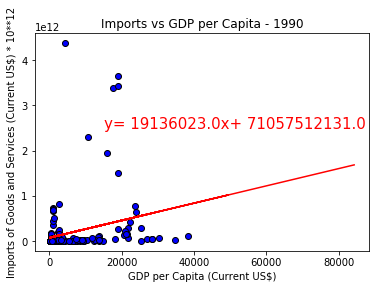

The Rsquared value is 0.14.


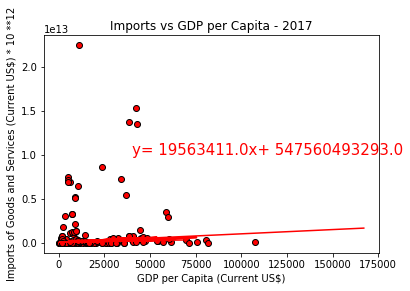

In [10]:
#Create a Scatter Plot of Imports vs GDP per Capita

#1990
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['1990_GDP_Cap']) & ~np.isnan(summary_df['1990_Imports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['1990_GDP_Cap'][mask], summary_df['1990_Imports'][mask])
#Calculate the Regress Values
regress_1990 = slope * summary_df['1990_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['1990_GDP_Cap'], summary_df['1990_Imports'], c = "blue", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['1990_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (15000, 2.5*10**12), fontsize = 15, color = "red")
#Create the Labels
plt.title("Imports vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Imports of Goods and Services (Current US$) * 10**12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Imports_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()


#2017
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['2017_GDP_Cap']) & ~np.isnan(summary_df['2017_Imports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['2017_GDP_Cap'][mask], summary_df['2017_Imports'][mask])
#Calculate the Regress Values
regress_2017 = slope * summary_df['2017_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_2017 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['2017_GDP_Cap'], summary_df['2017_Imports'], c = "red", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['2017_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_2017, xy = (40000, 1.0*10**13), fontsize = 15, color = "red")
#Create the Labels
plt.title("Imports vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Imports of Goods and Services (Current US$) * 10 **12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Imports_vs_GDP_per_Capita_2017")
#Show the Plot
plt.show()

The Rsquared value is 0.97.


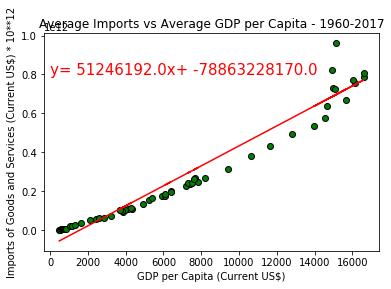

<Figure size 432x288 with 0 Axes>

In [11]:
#Create a Series Plot of Average Imports of Good and Services vs Average GDP per Capita Value Across Years

#Calculate the Average GDP per Capita Values
gdp_per_capita_1960 = summary_df['1960_GDP_Cap'].mean()
gdp_per_capita_1961 = summary_df['1961_GDP_Cap'].mean()
gdp_per_capita_1962 = summary_df['1962_GDP_Cap'].mean()
gdp_per_capita_1963 = summary_df['1963_GDP_Cap'].mean()
gdp_per_capita_1964 = summary_df['1964_GDP_Cap'].mean()
gdp_per_capita_1965 = summary_df['1965_GDP_Cap'].mean()
gdp_per_capita_1966 = summary_df['1966_GDP_Cap'].mean()
gdp_per_capita_1967 = summary_df['1967_GDP_Cap'].mean()
gdp_per_capita_1968 = summary_df['1968_GDP_Cap'].mean()
gdp_per_capita_1969 = summary_df['1969_GDP_Cap'].mean()
gdp_per_capita_1970 = summary_df['1970_GDP_Cap'].mean()
gdp_per_capita_1971 = summary_df['1971_GDP_Cap'].mean()
gdp_per_capita_1972 = summary_df['1972_GDP_Cap'].mean()
gdp_per_capita_1973 = summary_df['1973_GDP_Cap'].mean()
gdp_per_capita_1974 = summary_df['1974_GDP_Cap'].mean()
gdp_per_capita_1975 = summary_df['1975_GDP_Cap'].mean()
gdp_per_capita_1976 = summary_df['1976_GDP_Cap'].mean()
gdp_per_capita_1977 = summary_df['1977_GDP_Cap'].mean()
gdp_per_capita_1978 = summary_df['1978_GDP_Cap'].mean()
gdp_per_capita_1979 = summary_df['1979_GDP_Cap'].mean()
gdp_per_capita_1980 = summary_df['1980_GDP_Cap'].mean()
gdp_per_capita_1981 = summary_df['1981_GDP_Cap'].mean()
gdp_per_capita_1982 = summary_df['1982_GDP_Cap'].mean()
gdp_per_capita_1983 = summary_df['1983_GDP_Cap'].mean()
gdp_per_capita_1984 = summary_df['1984_GDP_Cap'].mean()
gdp_per_capita_1985 = summary_df['1985_GDP_Cap'].mean()
gdp_per_capita_1986 = summary_df['1986_GDP_Cap'].mean()
gdp_per_capita_1987 = summary_df['1987_GDP_Cap'].mean()
gdp_per_capita_1988 = summary_df['1988_GDP_Cap'].mean()
gdp_per_capita_1989 = summary_df['1989_GDP_Cap'].mean()
gdp_per_capita_1990 = summary_df['1990_GDP_Cap'].mean()
gdp_per_capita_1991 = summary_df['1991_GDP_Cap'].mean()
gdp_per_capita_1992 = summary_df['1992_GDP_Cap'].mean()
gdp_per_capita_1993 = summary_df['1993_GDP_Cap'].mean()
gdp_per_capita_1994 = summary_df['1994_GDP_Cap'].mean()
gdp_per_capita_1995 = summary_df['1995_GDP_Cap'].mean()
gdp_per_capita_1996 = summary_df['1996_GDP_Cap'].mean()
gdp_per_capita_1997 = summary_df['1997_GDP_Cap'].mean()
gdp_per_capita_1998 = summary_df['1998_GDP_Cap'].mean()
gdp_per_capita_1999 = summary_df['1999_GDP_Cap'].mean()
gdp_per_capita_2000 = summary_df['2000_GDP_Cap'].mean()
gdp_per_capita_2001 = summary_df['2001_GDP_Cap'].mean()
gdp_per_capita_2002 = summary_df['2002_GDP_Cap'].mean()
gdp_per_capita_2003 = summary_df['2003_GDP_Cap'].mean()
gdp_per_capita_2004 = summary_df['2004_GDP_Cap'].mean()
gdp_per_capita_2005 = summary_df['2005_GDP_Cap'].mean()
gdp_per_capita_2006 = summary_df['2006_GDP_Cap'].mean()
gdp_per_capita_2007 = summary_df['2007_GDP_Cap'].mean()
gdp_per_capita_2008 = summary_df['2008_GDP_Cap'].mean()
gdp_per_capita_2009 = summary_df['2009_GDP_Cap'].mean()
gdp_per_capita_2010 = summary_df['2010_GDP_Cap'].mean()
gdp_per_capita_2011 = summary_df['2011_GDP_Cap'].mean()
gdp_per_capita_2012 = summary_df['2012_GDP_Cap'].mean()
gdp_per_capita_2013 = summary_df['2013_GDP_Cap'].mean()
gdp_per_capita_2014 = summary_df['2014_GDP_Cap'].mean()
gdp_per_capita_2015 = summary_df['2015_GDP_Cap'].mean()
gdp_per_capita_2016 = summary_df['2016_GDP_Cap'].mean()
gdp_per_capita_2017 = summary_df['2017_GDP_Cap'].mean()
gdp_per_capita_2018 = summary_df['2018_GDP_Cap'].mean()
gdp_per_capita_2019 = summary_df['2019_GDP_Cap'].mean()

#Fill the GDP per Capita List
gdp_per_capita_list = [gdp_per_capita_1960, gdp_per_capita_1961, gdp_per_capita_1962, gdp_per_capita_1963, gdp_per_capita_1964,
                       gdp_per_capita_1965, gdp_per_capita_1966, gdp_per_capita_1967, gdp_per_capita_1968, gdp_per_capita_1969,
                       gdp_per_capita_1970, gdp_per_capita_1971, gdp_per_capita_1972, gdp_per_capita_1973, gdp_per_capita_1974,
                       gdp_per_capita_1975, gdp_per_capita_1976, gdp_per_capita_1977, gdp_per_capita_1978, gdp_per_capita_1979,
                       gdp_per_capita_1980, gdp_per_capita_1981, gdp_per_capita_1982, gdp_per_capita_1983, gdp_per_capita_1984,
                       gdp_per_capita_1985, gdp_per_capita_1986, gdp_per_capita_1987, gdp_per_capita_1988, gdp_per_capita_1989,
                       gdp_per_capita_1990, gdp_per_capita_1991, gdp_per_capita_1992, gdp_per_capita_1993, gdp_per_capita_1994,
                       gdp_per_capita_1995, gdp_per_capita_1996, gdp_per_capita_1997, gdp_per_capita_1998, gdp_per_capita_1999,
                       gdp_per_capita_2000, gdp_per_capita_2001, gdp_per_capita_2002, gdp_per_capita_2003, gdp_per_capita_2004,
                       gdp_per_capita_2005, gdp_per_capita_2006, gdp_per_capita_2007, gdp_per_capita_2008, gdp_per_capita_2009,
                       gdp_per_capita_2010, gdp_per_capita_2011, gdp_per_capita_2012, gdp_per_capita_2013, gdp_per_capita_2014,
                       gdp_per_capita_2015, gdp_per_capita_2016, gdp_per_capita_2017, gdp_per_capita_2018, gdp_per_capita_2019]

#Calculate the Average Export Values
imports_1960 = summary_df['1960_Imports'].mean()
imports_1961 = summary_df['1961_Imports'].mean()
imports_1962 = summary_df['1962_Imports'].mean()
imports_1963 = summary_df['1963_Imports'].mean()
imports_1964 = summary_df['1964_Imports'].mean()
imports_1965 = summary_df['1965_Imports'].mean()
imports_1966 = summary_df['1966_Imports'].mean()
imports_1967 = summary_df['1967_Imports'].mean()
imports_1968 = summary_df['1968_Imports'].mean()
imports_1969 = summary_df['1969_Imports'].mean()
imports_1970 = summary_df['1970_Imports'].mean()
imports_1971 = summary_df['1971_Imports'].mean()
imports_1972 = summary_df['1972_Imports'].mean()
imports_1973 = summary_df['1973_Imports'].mean()
imports_1974 = summary_df['1974_Imports'].mean()
imports_1975 = summary_df['1975_Imports'].mean()
imports_1976 = summary_df['1976_Imports'].mean()
imports_1977 = summary_df['1977_Imports'].mean()
imports_1978 = summary_df['1978_Imports'].mean()
imports_1979 = summary_df['1979_Imports'].mean()
imports_1980 = summary_df['1980_Imports'].mean()
imports_1981 = summary_df['1981_Imports'].mean()
imports_1982 = summary_df['1982_Imports'].mean()
imports_1983 = summary_df['1983_Imports'].mean()
imports_1984 = summary_df['1984_Imports'].mean()
imports_1985 = summary_df['1985_Imports'].mean()
imports_1986 = summary_df['1986_Imports'].mean()
imports_1987 = summary_df['1987_Imports'].mean()
imports_1988 = summary_df['1988_Imports'].mean()
imports_1989 = summary_df['1989_Imports'].mean()
imports_1990 = summary_df['1990_Imports'].mean()
imports_1991 = summary_df['1991_Imports'].mean()
imports_1992 = summary_df['1992_Imports'].mean()
imports_1993 = summary_df['1993_Imports'].mean()
imports_1994 = summary_df['1994_Imports'].mean()
imports_1995 = summary_df['1995_Imports'].mean()
imports_1996 = summary_df['1996_Imports'].mean()
imports_1997 = summary_df['1997_Imports'].mean()
imports_1998 = summary_df['1998_Imports'].mean()
imports_1999 = summary_df['1999_Imports'].mean()
imports_2000 = summary_df['2000_Imports'].mean()
imports_2001 = summary_df['2001_Imports'].mean()
imports_2002 = summary_df['2002_Imports'].mean()
imports_2003 = summary_df['2003_Imports'].mean()
imports_2004 = summary_df['2004_Imports'].mean()
imports_2005 = summary_df['2005_Imports'].mean()
imports_2006 = summary_df['2006_Imports'].mean()
imports_2007 = summary_df['2007_Imports'].mean()
imports_2008 = summary_df['2008_Imports'].mean()
imports_2009 = summary_df['2009_Imports'].mean()
imports_2010 = summary_df['2010_Imports'].mean()
imports_2011 = summary_df['2011_Imports'].mean()
imports_2012 = summary_df['2012_Imports'].mean()
imports_2013 = summary_df['2013_Imports'].mean()
imports_2014 = summary_df['2014_Imports'].mean()
imports_2015 = summary_df['2015_Imports'].mean()
imports_2016 = summary_df['2016_Imports'].mean()
imports_2017 = summary_df['2017_Imports'].mean()
imports_2018 = summary_df['2018_Imports'].mean()
imports_2019 = summary_df['2019_Imports'].mean()

#Fill the Exports List
imports_list = [imports_1960, imports_1961, imports_1962, imports_1963, imports_1964,
                       imports_1965, imports_1966, imports_1967, imports_1968, imports_1969,
                       imports_1970, imports_1971, imports_1972, imports_1973, imports_1974,
                       imports_1975, imports_1976, imports_1977, imports_1978, imports_1979,
                       imports_1980, imports_1981, imports_1982, imports_1983, imports_1984,
                       imports_1985, imports_1986, imports_1987, imports_1988, imports_1989,
                       imports_1990, imports_1991, imports_1992, imports_1993, imports_1994,
                       imports_1995, imports_1996, imports_1997, imports_1998, imports_1999,
                       imports_2000, imports_2001, imports_2002, imports_2003, imports_2004,
                       imports_2005, imports_2006, imports_2007, imports_2008, imports_2009,
                       imports_2010, imports_2011, imports_2012, imports_2013, imports_2014,
                       imports_2015, imports_2016, imports_2017, imports_2018, imports_2019]

#Create a DataFrame to Hold Exports & GDP per Capita Data
imports_gdp_per_capita_df = pd.DataFrame({'GDP per Capita':gdp_per_capita_list, 'Imports':imports_list})

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(imports_gdp_per_capita_df['GDP per Capita']) & ~np.isnan(imports_gdp_per_capita_df['Imports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(imports_gdp_per_capita_df['GDP per Capita'][mask], imports_gdp_per_capita_df['Imports'][mask])
#Calculate the Regress Values
regress_imports = slope * imports_gdp_per_capita_df['GDP per Capita'] + intercept
#Create the Line Equation
line_eq_imports = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Import vs GDP per Capita Data
plt.scatter(imports_gdp_per_capita_df['GDP per Capita'], imports_gdp_per_capita_df['Imports'], c = "green", edgecolors = "black")
#Plot the Regress Values
plt.plot(imports_gdp_per_capita_df['GDP per Capita'], regress_exports, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_exports, xy = (0, 0.8*10**12), fontsize = 15, color = "red")
#Create the Labels
plt.title("Average Imports vs Average GDP per Capita - 1960-2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Imports of Goods and Services (Current US$) * 10**12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Imports_vs_GDP_per_Capita_Years.png")
#Show the Plot
plt.show()
plt.tight_layout()

The Rsquared value is 1.0.


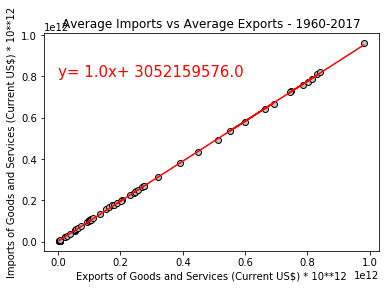

<Figure size 432x288 with 0 Axes>

In [12]:
#Create a Series Plot of Average Imports of Good and Services vs Average Exports of Goods and Services Across Years

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(exports_gdp_per_capita_df['Exports']) & ~np.isnan(imports_gdp_per_capita_df['Imports'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(exports_gdp_per_capita_df['Exports'][mask], imports_gdp_per_capita_df['Imports'][mask])
#Calculate the Regress Values
regress_imports_exports = slope * exports_gdp_per_capita_df['Exports'] + intercept
#Create the Line Equation
line_eq_imports_exports = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Import vs GDP per Capita Data
plt.scatter(exports_gdp_per_capita_df['Exports'], imports_gdp_per_capita_df['Imports'], c = "silver", edgecolors = "black")
#Plot the Regress Values
plt.plot(exports_gdp_per_capita_df['Exports'], regress_imports_exports, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_imports_exports, xy = (0, 0.8*10**12), fontsize = 15, color = "red")
#Create the Labels
plt.title("Average Imports vs Average Exports - 1960-2017")
plt.xlabel("Exports of Goods and Services (Current US$) * 10**12")
plt.ylabel("Imports of Goods and Services (Current US$) * 10**12")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Imports_vs_Exports_Years.png")
#Show the Plot
plt.show()
plt.tight_layout()

The Rsquared value is 0.6.


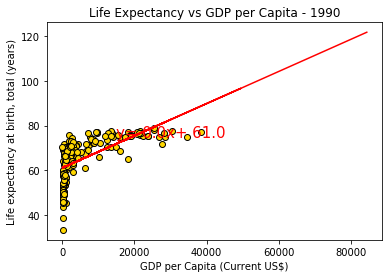

The Rsquared value is 0.67.


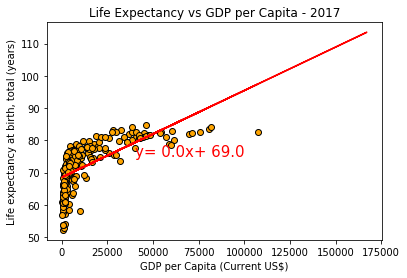

In [13]:
#Create a Scatter Plot of Life Expectancy vs GDP per Capita

#1990
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['1990_GDP_Cap']) & ~np.isnan(summary_df['1990_Life'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['1990_GDP_Cap'][mask], summary_df['1990_Life'][mask])
#Calculate the Regress Values
regress_1990 = slope * summary_df['1990_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['1990_GDP_Cap'], summary_df['1990_Life'], c = "gold", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['1990_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (15000, 75), fontsize = 15, color = "red")
#Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life expectancy at birth, total (years)")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Life_Expectancy_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()


#2017
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['2017_GDP_Cap']) & ~np.isnan(summary_df['2017_Life'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['2017_GDP_Cap'][mask], summary_df['2017_Life'][mask])
#Calculate the Regress Values
regress_2017 = slope * summary_df['2017_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_2017 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['2017_GDP_Cap'], summary_df['2017_Life'], c = "orange", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['2017_GDP_Cap'], regress_2017, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_2017, xy = (40000, 75), fontsize = 15, color = "red")
#Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life expectancy at birth, total (years)")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Life_Expectancy_vs_GDP_per_Capita_2017")
#Show the Plot
plt.show()

The Rsquared value is: 0.69.


C:\Users\bjros\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


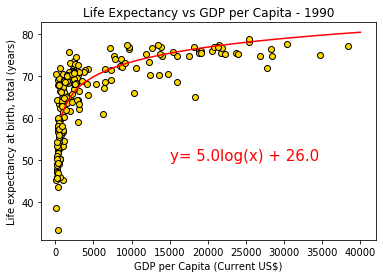

C:\Users\bjros\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log


The Rsquared value is: 0.74.


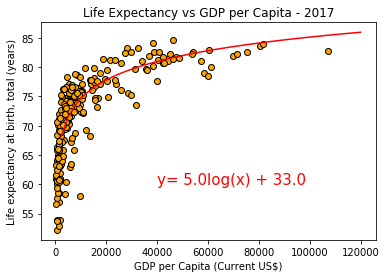

In [14]:
#Create a Scatter Plot of Life Expectancy vs GDP per Capita

#1990
#Found Data for Logarithmic Regression at https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
#and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#Assign Values to xData and yData
xdata = summary_df['1990_GDP_Cap']
ydata = summary_df['1990_Life']

# logarithmic function
def func(x, p1,p2):
  return p1*np.log(x)+p2

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
#Curve Definition
popt, pcov = curve_fit(func, xdata[mask], ydata[mask])

#Curve params
p1 = popt[0]
p2 = popt[1]

#Create the Line Equation
log_eq_1990 = "y= " + str(round(p1,0)) + "log(x) + " + str(round(p2,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "gold", edgecolors = "black")
#Create the Predicted Values
curvex=np.linspace(0,40000,50)
curvey=func(curvex,p1,p2)

#Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
#Calculate the Residuals
residuals = ydata - func(xdata, p1, p2)
#Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
#Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
#Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

#Plot the Regress Values
plt.plot(curvex, curvey, 'r')
#Annotate the Line Equation
plt.annotate(log_eq_1990, xy = (15000, 50), fontsize = 15, color = "red")
#Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life expectancy at birth, total (years)")
#Display the R squared Value
print(f"The Rsquared value is: {round(r_squared, 2)}.")
#Save the Plot as a PNG
plt.savefig("Life_Expectancy_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()


#2017
#Found Data for Logarithmic Regression at https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
#and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#Assign Values to xData and yData
xdata = summary_df['2017_GDP_Cap']
ydata = summary_df['2017_Life']

# logarithmic function
def func(x, p1,p2):
  return p1*np.log(x)+p2

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
#Curve Definition
popt, pcov = curve_fit(func, xdata[mask], ydata[mask])

#Curve params
p1 = popt[0]
p2 = popt[1]

#Create the Line Equation
log_eq_2017 = "y= " + str(round(p1,0)) + "log(x) + " + str(round(p2,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "orange", edgecolors = "black")
#Create the Predicted Values
curvex=np.linspace(0,120000,50)
curvey=func(curvex,p1,p2)

#Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
#Calculate the Residuals
residuals = ydata - func(xdata, p1, p2)
#Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
#Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
#Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

#Plot the Regress Values
plt.plot(curvex, curvey, 'r')
#Annotate the Line Equation
plt.annotate(log_eq_2017, xy = (40000, 60), fontsize = 15, color = "red")
#Create the Labels
plt.title("Life Expectancy vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life expectancy at birth, total (years)")
#Display the R squared Value
print(f"The Rsquared value is: {round(r_squared, 2)}.")
#Save the Plot as a PNG
plt.savefig("Life_Expectancy_vs_GDP_per_Capita_2017.png")
#Show the Plot
plt.show()

The Rsquared value is: 0.97.


C:\Users\bjros\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in log


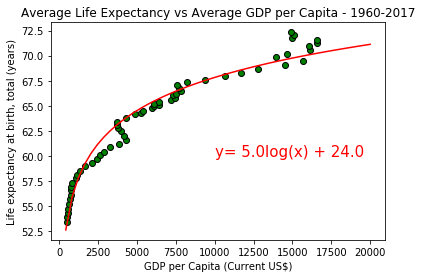

In [15]:
#Create a Series Plot of Life Expectancy vs Average GDP per Capita Value Across Years

#Calculate the Average GDP per Capita Values
gdp_per_capita_1960 = summary_df['1960_GDP_Cap'].mean()
gdp_per_capita_1961 = summary_df['1961_GDP_Cap'].mean()
gdp_per_capita_1962 = summary_df['1962_GDP_Cap'].mean()
gdp_per_capita_1963 = summary_df['1963_GDP_Cap'].mean()
gdp_per_capita_1964 = summary_df['1964_GDP_Cap'].mean()
gdp_per_capita_1965 = summary_df['1965_GDP_Cap'].mean()
gdp_per_capita_1966 = summary_df['1966_GDP_Cap'].mean()
gdp_per_capita_1967 = summary_df['1967_GDP_Cap'].mean()
gdp_per_capita_1968 = summary_df['1968_GDP_Cap'].mean()
gdp_per_capita_1969 = summary_df['1969_GDP_Cap'].mean()
gdp_per_capita_1970 = summary_df['1970_GDP_Cap'].mean()
gdp_per_capita_1971 = summary_df['1971_GDP_Cap'].mean()
gdp_per_capita_1972 = summary_df['1972_GDP_Cap'].mean()
gdp_per_capita_1973 = summary_df['1973_GDP_Cap'].mean()
gdp_per_capita_1974 = summary_df['1974_GDP_Cap'].mean()
gdp_per_capita_1975 = summary_df['1975_GDP_Cap'].mean()
gdp_per_capita_1976 = summary_df['1976_GDP_Cap'].mean()
gdp_per_capita_1977 = summary_df['1977_GDP_Cap'].mean()
gdp_per_capita_1978 = summary_df['1978_GDP_Cap'].mean()
gdp_per_capita_1979 = summary_df['1979_GDP_Cap'].mean()
gdp_per_capita_1980 = summary_df['1980_GDP_Cap'].mean()
gdp_per_capita_1981 = summary_df['1981_GDP_Cap'].mean()
gdp_per_capita_1982 = summary_df['1982_GDP_Cap'].mean()
gdp_per_capita_1983 = summary_df['1983_GDP_Cap'].mean()
gdp_per_capita_1984 = summary_df['1984_GDP_Cap'].mean()
gdp_per_capita_1985 = summary_df['1985_GDP_Cap'].mean()
gdp_per_capita_1986 = summary_df['1986_GDP_Cap'].mean()
gdp_per_capita_1987 = summary_df['1987_GDP_Cap'].mean()
gdp_per_capita_1988 = summary_df['1988_GDP_Cap'].mean()
gdp_per_capita_1989 = summary_df['1989_GDP_Cap'].mean()
gdp_per_capita_1990 = summary_df['1990_GDP_Cap'].mean()
gdp_per_capita_1991 = summary_df['1991_GDP_Cap'].mean()
gdp_per_capita_1992 = summary_df['1992_GDP_Cap'].mean()
gdp_per_capita_1993 = summary_df['1993_GDP_Cap'].mean()
gdp_per_capita_1994 = summary_df['1994_GDP_Cap'].mean()
gdp_per_capita_1995 = summary_df['1995_GDP_Cap'].mean()
gdp_per_capita_1996 = summary_df['1996_GDP_Cap'].mean()
gdp_per_capita_1997 = summary_df['1997_GDP_Cap'].mean()
gdp_per_capita_1998 = summary_df['1998_GDP_Cap'].mean()
gdp_per_capita_1999 = summary_df['1999_GDP_Cap'].mean()
gdp_per_capita_2000 = summary_df['2000_GDP_Cap'].mean()
gdp_per_capita_2001 = summary_df['2001_GDP_Cap'].mean()
gdp_per_capita_2002 = summary_df['2002_GDP_Cap'].mean()
gdp_per_capita_2003 = summary_df['2003_GDP_Cap'].mean()
gdp_per_capita_2004 = summary_df['2004_GDP_Cap'].mean()
gdp_per_capita_2005 = summary_df['2005_GDP_Cap'].mean()
gdp_per_capita_2006 = summary_df['2006_GDP_Cap'].mean()
gdp_per_capita_2007 = summary_df['2007_GDP_Cap'].mean()
gdp_per_capita_2008 = summary_df['2008_GDP_Cap'].mean()
gdp_per_capita_2009 = summary_df['2009_GDP_Cap'].mean()
gdp_per_capita_2010 = summary_df['2010_GDP_Cap'].mean()
gdp_per_capita_2011 = summary_df['2011_GDP_Cap'].mean()
gdp_per_capita_2012 = summary_df['2012_GDP_Cap'].mean()
gdp_per_capita_2013 = summary_df['2013_GDP_Cap'].mean()
gdp_per_capita_2014 = summary_df['2014_GDP_Cap'].mean()
gdp_per_capita_2015 = summary_df['2015_GDP_Cap'].mean()
gdp_per_capita_2016 = summary_df['2016_GDP_Cap'].mean()
gdp_per_capita_2017 = summary_df['2017_GDP_Cap'].mean()
gdp_per_capita_2018 = summary_df['2018_GDP_Cap'].mean()
gdp_per_capita_2019 = summary_df['2019_GDP_Cap'].mean()

#Fill the GDP per Capita List
gdp_per_capita_list = [gdp_per_capita_1960, gdp_per_capita_1961, gdp_per_capita_1962, gdp_per_capita_1963, gdp_per_capita_1964,
                       gdp_per_capita_1965, gdp_per_capita_1966, gdp_per_capita_1967, gdp_per_capita_1968, gdp_per_capita_1969,
                       gdp_per_capita_1970, gdp_per_capita_1971, gdp_per_capita_1972, gdp_per_capita_1973, gdp_per_capita_1974,
                       gdp_per_capita_1975, gdp_per_capita_1976, gdp_per_capita_1977, gdp_per_capita_1978, gdp_per_capita_1979,
                       gdp_per_capita_1980, gdp_per_capita_1981, gdp_per_capita_1982, gdp_per_capita_1983, gdp_per_capita_1984,
                       gdp_per_capita_1985, gdp_per_capita_1986, gdp_per_capita_1987, gdp_per_capita_1988, gdp_per_capita_1989,
                       gdp_per_capita_1990, gdp_per_capita_1991, gdp_per_capita_1992, gdp_per_capita_1993, gdp_per_capita_1994,
                       gdp_per_capita_1995, gdp_per_capita_1996, gdp_per_capita_1997, gdp_per_capita_1998, gdp_per_capita_1999,
                       gdp_per_capita_2000, gdp_per_capita_2001, gdp_per_capita_2002, gdp_per_capita_2003, gdp_per_capita_2004,
                       gdp_per_capita_2005, gdp_per_capita_2006, gdp_per_capita_2007, gdp_per_capita_2008, gdp_per_capita_2009,
                       gdp_per_capita_2010, gdp_per_capita_2011, gdp_per_capita_2012, gdp_per_capita_2013, gdp_per_capita_2014,
                       gdp_per_capita_2015, gdp_per_capita_2016, gdp_per_capita_2017, gdp_per_capita_2018, gdp_per_capita_2019]

#Calculate the Life Expectancy Values
life_expectancy_1960 = summary_df['1960_Life'].mean()
life_expectancy_1961 = summary_df['1961_Life'].mean()
life_expectancy_1962 = summary_df['1962_Life'].mean()
life_expectancy_1963 = summary_df['1963_Life'].mean()
life_expectancy_1964 = summary_df['1964_Life'].mean()
life_expectancy_1965 = summary_df['1965_Life'].mean()
life_expectancy_1966 = summary_df['1966_Life'].mean()
life_expectancy_1967 = summary_df['1967_Life'].mean()
life_expectancy_1968 = summary_df['1968_Life'].mean()
life_expectancy_1969 = summary_df['1969_Life'].mean()
life_expectancy_1970 = summary_df['1970_Life'].mean()
life_expectancy_1971 = summary_df['1971_Life'].mean()
life_expectancy_1972 = summary_df['1972_Life'].mean()
life_expectancy_1973 = summary_df['1973_Life'].mean()
life_expectancy_1974 = summary_df['1974_Life'].mean()
life_expectancy_1975 = summary_df['1975_Life'].mean()
life_expectancy_1976 = summary_df['1976_Life'].mean()
life_expectancy_1977 = summary_df['1977_Life'].mean()
life_expectancy_1978 = summary_df['1978_Life'].mean()
life_expectancy_1979 = summary_df['1979_Life'].mean()
life_expectancy_1980 = summary_df['1980_Life'].mean()
life_expectancy_1981 = summary_df['1981_Life'].mean()
life_expectancy_1982 = summary_df['1982_Life'].mean()
life_expectancy_1983 = summary_df['1983_Life'].mean()
life_expectancy_1984 = summary_df['1984_Life'].mean()
life_expectancy_1985 = summary_df['1985_Life'].mean()
life_expectancy_1986 = summary_df['1986_Life'].mean()
life_expectancy_1987 = summary_df['1987_Life'].mean()
life_expectancy_1988 = summary_df['1988_Life'].mean()
life_expectancy_1989 = summary_df['1989_Life'].mean()
life_expectancy_1990 = summary_df['1990_Life'].mean()
life_expectancy_1991 = summary_df['1991_Life'].mean()
life_expectancy_1992 = summary_df['1992_Life'].mean()
life_expectancy_1993 = summary_df['1993_Life'].mean()
life_expectancy_1994 = summary_df['1994_Life'].mean()
life_expectancy_1995 = summary_df['1995_Life'].mean()
life_expectancy_1996 = summary_df['1996_Life'].mean()
life_expectancy_1997 = summary_df['1997_Life'].mean()
life_expectancy_1998 = summary_df['1998_Life'].mean()
life_expectancy_1999 = summary_df['1999_Life'].mean()
life_expectancy_2000 = summary_df['2000_Life'].mean()
life_expectancy_2001 = summary_df['2001_Life'].mean()
life_expectancy_2002 = summary_df['2002_Life'].mean()
life_expectancy_2003 = summary_df['2003_Life'].mean()
life_expectancy_2004 = summary_df['2004_Life'].mean()
life_expectancy_2005 = summary_df['2005_Life'].mean()
life_expectancy_2006 = summary_df['2006_Life'].mean()
life_expectancy_2007 = summary_df['2007_Life'].mean()
life_expectancy_2008 = summary_df['2008_Life'].mean()
life_expectancy_2009 = summary_df['2009_Life'].mean()
life_expectancy_2010 = summary_df['2010_Life'].mean()
life_expectancy_2011 = summary_df['2011_Life'].mean()
life_expectancy_2012 = summary_df['2012_Life'].mean()
life_expectancy_2013 = summary_df['2013_Life'].mean()
life_expectancy_2014 = summary_df['2014_Life'].mean()
life_expectancy_2015 = summary_df['2015_Life'].mean()
life_expectancy_2016 = summary_df['2016_Life'].mean()
life_expectancy_2017 = summary_df['2017_Life'].mean()
life_expectancy_2018 = summary_df['2018_Life'].mean()
life_expectancy_2019 = summary_df['2019_Life'].mean()

#Fill the Exports List
life_expectancy_list = [life_expectancy_1960, life_expectancy_1961, life_expectancy_1962, life_expectancy_1963, life_expectancy_1964,
                       life_expectancy_1965, life_expectancy_1966, life_expectancy_1967, life_expectancy_1968, life_expectancy_1969,
                       life_expectancy_1970, life_expectancy_1971, life_expectancy_1972, life_expectancy_1973, life_expectancy_1974,
                       life_expectancy_1975, life_expectancy_1976, life_expectancy_1977, life_expectancy_1978, life_expectancy_1979,
                       life_expectancy_1980, life_expectancy_1981, life_expectancy_1982, life_expectancy_1983, life_expectancy_1984,
                       life_expectancy_1985, life_expectancy_1986, life_expectancy_1987, life_expectancy_1988, life_expectancy_1989,
                       life_expectancy_1990, life_expectancy_1991, life_expectancy_1992, life_expectancy_1993, life_expectancy_1994,
                       life_expectancy_1995, life_expectancy_1996, life_expectancy_1997, life_expectancy_1998, life_expectancy_1999,
                       life_expectancy_2000, life_expectancy_2001, life_expectancy_2002, life_expectancy_2003, life_expectancy_2004,
                       life_expectancy_2005, life_expectancy_2006, life_expectancy_2007, life_expectancy_2008, life_expectancy_2009,
                       life_expectancy_2010, life_expectancy_2011, life_expectancy_2012, life_expectancy_2013, life_expectancy_2014,
                       life_expectancy_2015, life_expectancy_2016, life_expectancy_2017, life_expectancy_2018, life_expectancy_2019]

#Create a DataFrame to Hold Exports & GDP per Capita Data
life_expectancy_gdp_per_capita_df = pd.DataFrame({'GDP per Capita':gdp_per_capita_list, 'Life Expectancy':life_expectancy_list})

#Found Data for Logarithmic Regression at https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
#and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#Assign Values to xData and yData
xdata = life_expectancy_gdp_per_capita_df['GDP per Capita']
ydata = life_expectancy_gdp_per_capita_df['Life Expectancy']

# logarithmic function
def func(x, p1,p2):
  return p1*np.log(x)+p2

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
#Curve Definition
popt, pcov = curve_fit(func, xdata[mask], ydata[mask])

#Curve params
p1 = popt[0]
p2 = popt[1]

#Create the Line Equation
log_eq_life_expectancy = "y= " + str(round(p1,0)) + "log(x) + " + str(round(p2,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "green", edgecolors = "black")
#Create the Predicted Values
curvex=np.linspace(0,20000,50)
curvey=func(curvex,p1,p2)

#Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
#Calculate the Residuals
residuals = ydata - func(xdata, p1, p2)
#Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
#Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
#Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

#Plot the Regress Values
plt.plot(curvex, curvey, 'r')
#Annotate the Line Equation
plt.annotate(log_eq_life_expectancy, xy = (10000, 60), fontsize = 15, color = "red")
#Create the Labels
plt.title("Average Life Expectancy vs Average GDP per Capita - 1960-2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Life expectancy at birth, total (years)")
#Display the R squared Value
print(f"The Rsquared value is: {round(r_squared, 2)}.")
#Save the Plot as a PNG
plt.savefig("Life_Expectancy_vs_GDP_per_Capita_Years.png")
#Show the Plot
plt.show()

The Rsquared value is -0.52.


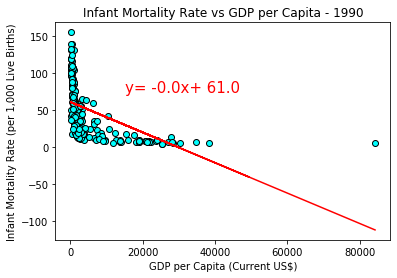

The Rsquared value is -0.51.


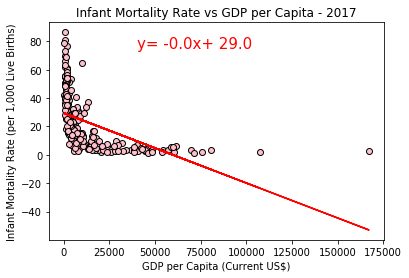

In [16]:
#Create a Scatter Plot of Infant Mortality Rate vs GDP per Capita

#1990
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['1990_GDP_Cap']) & ~np.isnan(summary_df['1990_Mortality'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['1990_GDP_Cap'][mask], summary_df['1990_Mortality'][mask])
#Calculate the Regress Values
regress_1990 = slope * summary_df['1990_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_1990 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['1990_GDP_Cap'], summary_df['1990_Mortality'], c = "cyan", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['1990_GDP_Cap'], regress_1990, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_1990, xy = (15000, 75), fontsize = 15, color = "red")
#Create the Labels
plt.title("Infant Mortality Rate vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality Rate (per 1,000 Live Births)")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Infant_Mortality_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()


#2017
#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(summary_df['2017_GDP_Cap']) & ~np.isnan(summary_df['2017_Mortality'])
#Make the Regression Parameters
(slope, intercept, rvalue, pvalue, stderr) = linregress(summary_df['2017_GDP_Cap'][mask], summary_df['2017_Mortality'][mask])
#Calculate the Regress Values
regress_2017 = slope * summary_df['2017_GDP_Cap'] + intercept
#Create the Line Equation
line_eq_2017 = "y= " + str(round(slope,0)) + "x+ " + str(round(intercept,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(summary_df['2017_GDP_Cap'], summary_df['2017_Mortality'], c = "pink", edgecolors = "black")
#Plot the Regress Values
plt.plot(summary_df['2017_GDP_Cap'], regress_2017, c = "red")
#Annotate the Line Equation
plt.annotate(line_eq_2017, xy = (40000, 75), fontsize = 15, color = "red")
#Create the Labels
plt.title("Infant Mortality Rate vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality Rate (per 1,000 Live Births)")
#Display the R squared Value
print(f"The Rsquared value is {round(rvalue,2)}.")
#Save the Plot as a PNG
plt.savefig("Infant_Mortality_vs_GDP_per_Capita_2017")
#Show the Plot
plt.show()

The Rsquared value is: 0.73.


C:\Users\bjros\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


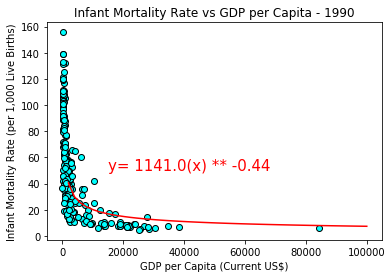

The Rsquared value is: 0.66.


C:\Users\bjros\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in power


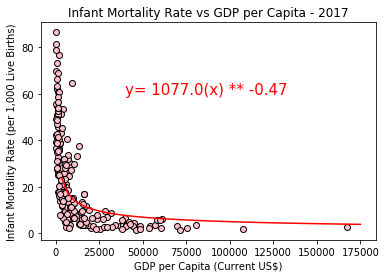

In [17]:
#Create a Scatter Plot of Infant Mortality Rate vs GDP per Capita

#1990
#Found Data for Power Regression at https://stackoverflow.com/questions/32121877/how-do-i-replicate-excels-power-trendline-in-python
#Assign Values to xData and yData
xdata = summary_df['1990_GDP_Cap']
ydata = summary_df['1990_Mortality']

# power function
def func(x, p1, p2):
  return p1*x**-p2

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
#Curve Definition
popt, pcov = curve_fit(func, xdata[mask], ydata[mask])

#Curve params
p1 = popt[0]
p2 = popt[1]

#Create the Line Equation
log_eq_1990 = "y= " + str(round(p1,0)) + "(x) ** -" + str(round(p2,2))
#Plot the Export vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "cyan", edgecolors = "black")
#Create the Predicted Values
curvex=np.linspace(0,100000,50)
curvey=func(curvex,p1,p2)

#Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
#Calculate the Residuals
residuals = ydata - func(xdata, p1, p2)
#Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
#Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
#Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

#Plot the Regress Values
plt.plot(curvex, curvey, 'r')
#Annotate the Line Equation
plt.annotate(log_eq_1990, xy = (15000, 50), fontsize = 15, color = "red")
#Create the Labels
plt.title("Infant Mortality Rate vs GDP per Capita - 1990")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality Rate (per 1,000 Live Births)")
#Display the R squared Value
print(f"The Rsquared value is: {round(r_squared, 2)}.")
#Save the Plot as a PNG
plt.savefig("Infant_Mortality_vs_GDP_per_Capita_1990.png")
#Show the Plot
plt.show()


#2017
#Found Data for Power Regression at https://stackoverflow.com/questions/32121877/how-do-i-replicate-excels-power-trendline-in-python
#Assign Values to xData and yData
xdata = summary_df['2017_GDP_Cap']
ydata = summary_df['2017_Mortality']

# power function
def func(x, p1,p2):
  return p1*x**-p2

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
#Curve Definition
popt, pcov = curve_fit(func, xdata[mask], ydata[mask])

#Curve params
p1 = popt[0]
p2 = popt[1]

#Create the Line Equation
log_eq_2017 = "y= " + str(round(p1,0)) + "(x) ** -" + str(round(p2,2))
#Plot the Export vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "pink", edgecolors = "black")
#Create the Predicted Values
curvex=np.linspace(0,175000,50)
curvey=func(curvex,p1,p2)

#Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
#Calculate the Residuals
residuals = ydata - func(xdata, p1, p2)
#Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
#Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
#Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

#Plot the Regress Values
plt.plot(curvex, curvey, 'r')
#Annotate the Line Equation
plt.annotate(log_eq_2017, xy = (40000, 60), fontsize = 15, color = "red")
#Create the Labels
plt.title("Infant Mortality Rate vs GDP per Capita - 2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality Rate (per 1,000 Live Births)")
#Display the R squared Value
print(f"The Rsquared value is: {round(r_squared, 2)}.")
#Save the Plot as a PNG
plt.savefig("Infant_Mortality_vs_GDP_per_Capita_2017.png")
#Show the Plot
plt.show()

The Rsquared value is: 0.98.


C:\Users\bjros\Anaconda3\lib\site-packages\ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in log


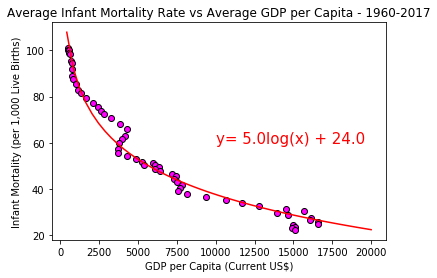

In [18]:
#Create a Series Plot of Infant Mortality Rate vs Average GDP per Capita Value Across Years

#Calculate the Average GDP per Capita Values
gdp_per_capita_1960 = summary_df['1960_GDP_Cap'].mean()
gdp_per_capita_1961 = summary_df['1961_GDP_Cap'].mean()
gdp_per_capita_1962 = summary_df['1962_GDP_Cap'].mean()
gdp_per_capita_1963 = summary_df['1963_GDP_Cap'].mean()
gdp_per_capita_1964 = summary_df['1964_GDP_Cap'].mean()
gdp_per_capita_1965 = summary_df['1965_GDP_Cap'].mean()
gdp_per_capita_1966 = summary_df['1966_GDP_Cap'].mean()
gdp_per_capita_1967 = summary_df['1967_GDP_Cap'].mean()
gdp_per_capita_1968 = summary_df['1968_GDP_Cap'].mean()
gdp_per_capita_1969 = summary_df['1969_GDP_Cap'].mean()
gdp_per_capita_1970 = summary_df['1970_GDP_Cap'].mean()
gdp_per_capita_1971 = summary_df['1971_GDP_Cap'].mean()
gdp_per_capita_1972 = summary_df['1972_GDP_Cap'].mean()
gdp_per_capita_1973 = summary_df['1973_GDP_Cap'].mean()
gdp_per_capita_1974 = summary_df['1974_GDP_Cap'].mean()
gdp_per_capita_1975 = summary_df['1975_GDP_Cap'].mean()
gdp_per_capita_1976 = summary_df['1976_GDP_Cap'].mean()
gdp_per_capita_1977 = summary_df['1977_GDP_Cap'].mean()
gdp_per_capita_1978 = summary_df['1978_GDP_Cap'].mean()
gdp_per_capita_1979 = summary_df['1979_GDP_Cap'].mean()
gdp_per_capita_1980 = summary_df['1980_GDP_Cap'].mean()
gdp_per_capita_1981 = summary_df['1981_GDP_Cap'].mean()
gdp_per_capita_1982 = summary_df['1982_GDP_Cap'].mean()
gdp_per_capita_1983 = summary_df['1983_GDP_Cap'].mean()
gdp_per_capita_1984 = summary_df['1984_GDP_Cap'].mean()
gdp_per_capita_1985 = summary_df['1985_GDP_Cap'].mean()
gdp_per_capita_1986 = summary_df['1986_GDP_Cap'].mean()
gdp_per_capita_1987 = summary_df['1987_GDP_Cap'].mean()
gdp_per_capita_1988 = summary_df['1988_GDP_Cap'].mean()
gdp_per_capita_1989 = summary_df['1989_GDP_Cap'].mean()
gdp_per_capita_1990 = summary_df['1990_GDP_Cap'].mean()
gdp_per_capita_1991 = summary_df['1991_GDP_Cap'].mean()
gdp_per_capita_1992 = summary_df['1992_GDP_Cap'].mean()
gdp_per_capita_1993 = summary_df['1993_GDP_Cap'].mean()
gdp_per_capita_1994 = summary_df['1994_GDP_Cap'].mean()
gdp_per_capita_1995 = summary_df['1995_GDP_Cap'].mean()
gdp_per_capita_1996 = summary_df['1996_GDP_Cap'].mean()
gdp_per_capita_1997 = summary_df['1997_GDP_Cap'].mean()
gdp_per_capita_1998 = summary_df['1998_GDP_Cap'].mean()
gdp_per_capita_1999 = summary_df['1999_GDP_Cap'].mean()
gdp_per_capita_2000 = summary_df['2000_GDP_Cap'].mean()
gdp_per_capita_2001 = summary_df['2001_GDP_Cap'].mean()
gdp_per_capita_2002 = summary_df['2002_GDP_Cap'].mean()
gdp_per_capita_2003 = summary_df['2003_GDP_Cap'].mean()
gdp_per_capita_2004 = summary_df['2004_GDP_Cap'].mean()
gdp_per_capita_2005 = summary_df['2005_GDP_Cap'].mean()
gdp_per_capita_2006 = summary_df['2006_GDP_Cap'].mean()
gdp_per_capita_2007 = summary_df['2007_GDP_Cap'].mean()
gdp_per_capita_2008 = summary_df['2008_GDP_Cap'].mean()
gdp_per_capita_2009 = summary_df['2009_GDP_Cap'].mean()
gdp_per_capita_2010 = summary_df['2010_GDP_Cap'].mean()
gdp_per_capita_2011 = summary_df['2011_GDP_Cap'].mean()
gdp_per_capita_2012 = summary_df['2012_GDP_Cap'].mean()
gdp_per_capita_2013 = summary_df['2013_GDP_Cap'].mean()
gdp_per_capita_2014 = summary_df['2014_GDP_Cap'].mean()
gdp_per_capita_2015 = summary_df['2015_GDP_Cap'].mean()
gdp_per_capita_2016 = summary_df['2016_GDP_Cap'].mean()
gdp_per_capita_2017 = summary_df['2017_GDP_Cap'].mean()
gdp_per_capita_2018 = summary_df['2018_GDP_Cap'].mean()
gdp_per_capita_2019 = summary_df['2019_GDP_Cap'].mean()

#Fill the GDP per Capita List
gdp_per_capita_list = [gdp_per_capita_1960, gdp_per_capita_1961, gdp_per_capita_1962, gdp_per_capita_1963, gdp_per_capita_1964,
                       gdp_per_capita_1965, gdp_per_capita_1966, gdp_per_capita_1967, gdp_per_capita_1968, gdp_per_capita_1969,
                       gdp_per_capita_1970, gdp_per_capita_1971, gdp_per_capita_1972, gdp_per_capita_1973, gdp_per_capita_1974,
                       gdp_per_capita_1975, gdp_per_capita_1976, gdp_per_capita_1977, gdp_per_capita_1978, gdp_per_capita_1979,
                       gdp_per_capita_1980, gdp_per_capita_1981, gdp_per_capita_1982, gdp_per_capita_1983, gdp_per_capita_1984,
                       gdp_per_capita_1985, gdp_per_capita_1986, gdp_per_capita_1987, gdp_per_capita_1988, gdp_per_capita_1989,
                       gdp_per_capita_1990, gdp_per_capita_1991, gdp_per_capita_1992, gdp_per_capita_1993, gdp_per_capita_1994,
                       gdp_per_capita_1995, gdp_per_capita_1996, gdp_per_capita_1997, gdp_per_capita_1998, gdp_per_capita_1999,
                       gdp_per_capita_2000, gdp_per_capita_2001, gdp_per_capita_2002, gdp_per_capita_2003, gdp_per_capita_2004,
                       gdp_per_capita_2005, gdp_per_capita_2006, gdp_per_capita_2007, gdp_per_capita_2008, gdp_per_capita_2009,
                       gdp_per_capita_2010, gdp_per_capita_2011, gdp_per_capita_2012, gdp_per_capita_2013, gdp_per_capita_2014,
                       gdp_per_capita_2015, gdp_per_capita_2016, gdp_per_capita_2017, gdp_per_capita_2018, gdp_per_capita_2019]

#Calculate the Life Expectancy Values
infant_mortality_1960 = summary_df['1960_Mortality'].mean()
infant_mortality_1961 = summary_df['1961_Mortality'].mean()
infant_mortality_1962 = summary_df['1962_Mortality'].mean()
infant_mortality_1963 = summary_df['1963_Mortality'].mean()
infant_mortality_1964 = summary_df['1964_Mortality'].mean()
infant_mortality_1965 = summary_df['1965_Mortality'].mean()
infant_mortality_1966 = summary_df['1966_Mortality'].mean()
infant_mortality_1967 = summary_df['1967_Mortality'].mean()
infant_mortality_1968 = summary_df['1968_Mortality'].mean()
infant_mortality_1969 = summary_df['1969_Mortality'].mean()
infant_mortality_1970 = summary_df['1970_Mortality'].mean()
infant_mortality_1971 = summary_df['1971_Mortality'].mean()
infant_mortality_1972 = summary_df['1972_Mortality'].mean()
infant_mortality_1973 = summary_df['1973_Mortality'].mean()
infant_mortality_1974 = summary_df['1974_Mortality'].mean()
infant_mortality_1975 = summary_df['1975_Mortality'].mean()
infant_mortality_1976 = summary_df['1976_Mortality'].mean()
infant_mortality_1977 = summary_df['1977_Mortality'].mean()
infant_mortality_1978 = summary_df['1978_Mortality'].mean()
infant_mortality_1979 = summary_df['1979_Mortality'].mean()
infant_mortality_1980 = summary_df['1980_Mortality'].mean()
infant_mortality_1981 = summary_df['1981_Mortality'].mean()
infant_mortality_1982 = summary_df['1982_Mortality'].mean()
infant_mortality_1983 = summary_df['1983_Mortality'].mean()
infant_mortality_1984 = summary_df['1984_Mortality'].mean()
infant_mortality_1985 = summary_df['1985_Mortality'].mean()
infant_mortality_1986 = summary_df['1986_Mortality'].mean()
infant_mortality_1987 = summary_df['1987_Mortality'].mean()
infant_mortality_1988 = summary_df['1988_Mortality'].mean()
infant_mortality_1989 = summary_df['1989_Mortality'].mean()
infant_mortality_1990 = summary_df['1990_Mortality'].mean()
infant_mortality_1991 = summary_df['1991_Mortality'].mean()
infant_mortality_1992 = summary_df['1992_Mortality'].mean()
infant_mortality_1993 = summary_df['1993_Mortality'].mean()
infant_mortality_1994 = summary_df['1994_Mortality'].mean()
infant_mortality_1995 = summary_df['1995_Mortality'].mean()
infant_mortality_1996 = summary_df['1996_Mortality'].mean()
infant_mortality_1997 = summary_df['1997_Mortality'].mean()
infant_mortality_1998 = summary_df['1998_Mortality'].mean()
infant_mortality_1999 = summary_df['1999_Mortality'].mean()
infant_mortality_2000 = summary_df['2000_Mortality'].mean()
infant_mortality_2001 = summary_df['2001_Mortality'].mean()
infant_mortality_2002 = summary_df['2002_Mortality'].mean()
infant_mortality_2003 = summary_df['2003_Mortality'].mean()
infant_mortality_2004 = summary_df['2004_Mortality'].mean()
infant_mortality_2005 = summary_df['2005_Mortality'].mean()
infant_mortality_2006 = summary_df['2006_Mortality'].mean()
infant_mortality_2007 = summary_df['2007_Mortality'].mean()
infant_mortality_2008 = summary_df['2008_Mortality'].mean()
infant_mortality_2009 = summary_df['2009_Mortality'].mean()
infant_mortality_2010 = summary_df['2010_Mortality'].mean()
infant_mortality_2011 = summary_df['2011_Mortality'].mean()
infant_mortality_2012 = summary_df['2012_Mortality'].mean()
infant_mortality_2013 = summary_df['2013_Mortality'].mean()
infant_mortality_2014 = summary_df['2014_Mortality'].mean()
infant_mortality_2015 = summary_df['2015_Mortality'].mean()
infant_mortality_2016 = summary_df['2016_Mortality'].mean()
infant_mortality_2017 = summary_df['2017_Mortality'].mean()
infant_mortality_2018 = summary_df['2018_Mortality'].mean()
infant_mortality_2019 = summary_df['2019_Mortality'].mean()

#Fill the Exports List
infant_mortality_list = [infant_mortality_1960, infant_mortality_1961, infant_mortality_1962, infant_mortality_1963, infant_mortality_1964,
                       infant_mortality_1965, infant_mortality_1966, infant_mortality_1967, infant_mortality_1968, infant_mortality_1969,
                       infant_mortality_1970, infant_mortality_1971, infant_mortality_1972, infant_mortality_1973, infant_mortality_1974,
                       infant_mortality_1975, infant_mortality_1976, infant_mortality_1977, infant_mortality_1978, infant_mortality_1979,
                       infant_mortality_1980, infant_mortality_1981, infant_mortality_1982, infant_mortality_1983, infant_mortality_1984,
                       infant_mortality_1985, infant_mortality_1986, infant_mortality_1987, infant_mortality_1988, infant_mortality_1989,
                       infant_mortality_1990, infant_mortality_1991, infant_mortality_1992, infant_mortality_1993, infant_mortality_1994,
                       infant_mortality_1995, infant_mortality_1996, infant_mortality_1997, infant_mortality_1998, infant_mortality_1999,
                       infant_mortality_2000, infant_mortality_2001, infant_mortality_2002, infant_mortality_2003, infant_mortality_2004,
                       infant_mortality_2005, infant_mortality_2006, infant_mortality_2007, infant_mortality_2008, infant_mortality_2009,
                       infant_mortality_2010, infant_mortality_2011, infant_mortality_2012, infant_mortality_2013, infant_mortality_2014,
                       infant_mortality_2015, infant_mortality_2016, infant_mortality_2017, infant_mortality_2018, infant_mortality_2019]

#Create a DataFrame to Hold Exports & GDP per Capita Data
infant_mortality_gdp_per_capita_df = pd.DataFrame({'GDP per Capita':gdp_per_capita_list, 'Life Expectancy':infant_mortality_list})

#Found Data for Logarithmic Regression at https://stats.stackexchange.com/questions/190107/curve-fit-with-logarithmic-regression-in-python
#and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#Assign Values to xData and yData
xdata = infant_mortality_gdp_per_capita_df['GDP per Capita']
ydata = infant_mortality_gdp_per_capita_df['Life Expectancy']

# logarithmic function
def func(x, p1,p2):
  return p1*np.log(x)+p2

#Apply Mask to Handle NaN Data
#Code Found on https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
mask = ~np.isnan(xdata) & ~np.isnan(ydata)
#Curve Definition
popt, pcov = curve_fit(func, xdata[mask], ydata[mask])

#Curve params
p1 = popt[0]
p2 = popt[1]

#Create the Line Equation
log_eq_infant_mortality = "y= " + str(round(p1,0)) + "log(x) + " + str(round(p2,0))
#Plot the Export vs GDP per Capita Data
plt.scatter(xdata, ydata, c = "magenta", edgecolors = "black")
#Create the Predicted Values
curvex=np.linspace(0,20000,50)
curvey=func(curvex,p1,p2)

#Method found at https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
#Calculate the Residuals
residuals = ydata - func(xdata, p1, p2)
#Calculate the Residual Sum of Squares
ss_res = np.sum(residuals**2)
#Calculate the Total Sum of Squares
ss_tot = np.sum((ydata - np.mean(ydata))**2)
#Calculate the Rsquared Value
r_squared = 1 -(ss_res/ss_tot)

#Plot the Regress Values
plt.plot(curvex, curvey, 'r')
#Annotate the Line Equation
plt.annotate(log_eq_life_expectancy, xy = (10000, 60), fontsize = 15, color = "red")
#Create the Labels
plt.title("Average Infant Mortality Rate vs Average GDP per Capita - 1960-2017")
plt.xlabel("GDP per Capita (Current US$)")
plt.ylabel("Infant Mortality (per 1,000 Live Births)")
#Display the R squared Value
print(f"The Rsquared value is: {round(r_squared, 2)}.")
#Save the Plot as a PNG
plt.savefig("Infant_Mortality_vs_GDP_per_Capita_Years.png")
#Show the Plot
plt.show()